In [13]:
!unzip countries.zip


Archive:  countries.zip
  inflating: countries               


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [15]:
df = pd.read_csv("/content/countries.zip")
df.head()


,Country,Continent,AvgAltitude,Population,Cluster
0,Afghanistan,Oceania,4152,1090065285,1
1,Albania,South America,1302,1278752355,3
2,Algeria,Asia,213,808383780,3
3,Andorra,Asia,3702,1056370742,1
4,Angola,Africa,2860,1432570580,3


In [16]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df


,AvgAltitude,Population,Cluster
0,4152,1090065285,1
1,1302,1278752355,3
2,213,808383780,3
3,3702,1056370742,1
4,2860,1432570580,3
...,...,...,...
205,691,1307826123,3
206,3243,355465537,1
207,1617,932642458,3
208,4402,1139974096,1


In [18]:
numeric_df = numeric_df.fillna(numeric_df.mean())
print(numeric_df)

     AvgAltitude  Population  Cluster
0           4152  1090065285        1
1           1302  1278752355        3
2            213   808383780        3
3           3702  1056370742        1
4           2860  1432570580        3
..           ...         ...      ...
205          691  1307826123        3
206         3243   355465537        1
207         1617   932642458        3
208         4402  1139974096        1
209          839   248883176        2

[210 rows x 3 columns]


In [19]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
print(scaled_data)

[[ 1.08703953  0.77117223 -0.90905404]
 [-0.84755111  1.21795315  1.26027947]
 [-1.58676837  0.1041953   1.26027947]
 [ 0.78157785  0.69138892 -0.90905404]
 [ 0.21002511  1.5821702   1.26027947]
 [ 0.39669613 -1.05318612 -0.90905404]
 [ 0.53381449  0.65753607 -0.90905404]
 [ 1.55066248 -0.02728343 -0.90905404]
 [ 1.3185116   1.64275811 -0.90905404]
 [ 1.61447003  0.53250066 -0.90905404]
 [-0.0825393   1.12435482  1.26027947]
 [-1.38312725 -0.1953012   1.26027947]
 [-0.52036771  1.01928195  1.26027947]
 [-1.34036262  0.93801367  1.26027947]
 [ 1.61990046 -0.8437403  -0.90905404]
 [ 0.08648283  0.96412019  1.26027947]
 [-0.27124674 -0.63947382 -0.90905404]
 [ 1.54862607  0.17931308 -0.90905404]
 [ 0.83316693 -0.40635847 -0.90905404]
 [-0.40293466  0.06748106  1.26027947]
 [-0.4097227   0.66509074  1.26027947]
 [-1.27180344  0.46574108  1.26027947]
 [-0.45791777  1.66464835  1.26027947]
 [-0.18368106 -1.3412253   0.17561271]
 [-0.62626109 -1.41859555  0.17561271]
 [ 1.01101351 -0.45401906

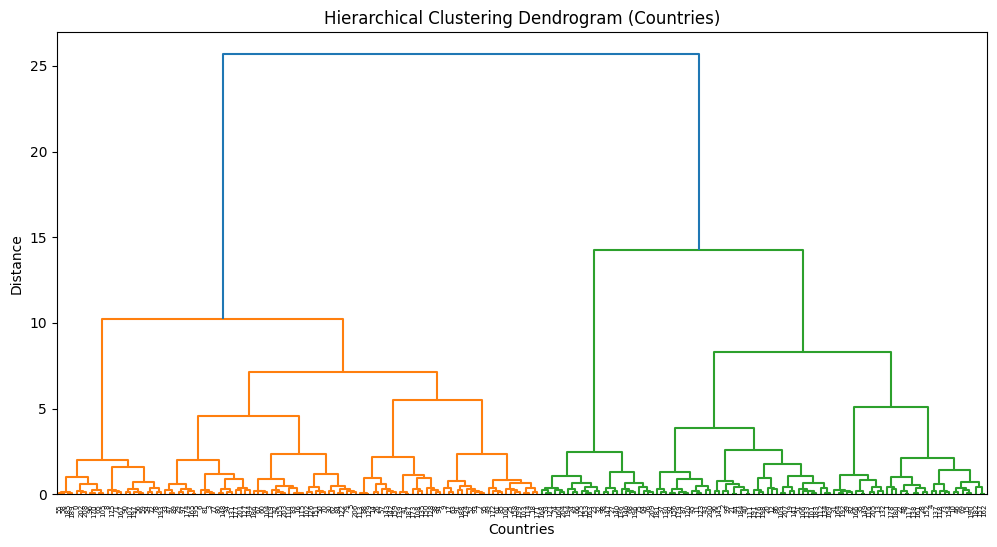

In [20]:
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram (Countries)")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()


In [21]:
# Create 3 clusters
cluster_labels = fcluster(linked, t=3, criterion='maxclust')

df['Cluster'] = cluster_labels
df.head()


,Country,Continent,AvgAltitude,Population,Cluster
0,Afghanistan,Oceania,4152,1090065285,1
1,Albania,South America,1302,1278752355,3
2,Algeria,Asia,213,808383780,3
3,Andorra,Asia,3702,1056370742,1
4,Angola,Africa,2860,1432570580,3


In [26]:
df.to_pickle('/content/countries_clustered.pkl')
print("DataFrame saved to countries_clustered.pkl")

DataFrame saved to countries_clustered.pkl


In [25]:
df.to_csv("/content/countries_clustered.csv", index=False)
print("csv file created successfully")

csv file created successfully
